In [1]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"

prompt = """
Consideration product : 工厂现货PVC充气青蛙夜市地摊热卖充气玩具发光蛙儿童水上玩具

1. Compose human readable product title used on Amazon in english within 20 words.
2. Write 5 selling points for the products in Amazon.
3. Evaluate a price range for this product in U.S.

Output the result in json format with three properties called title, selling_points and price_range
"""

def get_response(prompt):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
    )
    message = completions.choices[0].text
    return message

print(get_response(prompt)) 


{
    "title": "PVC Inflatable Glow-in-the-Dark Frog Water Toy for Kids Night Market Stall Hot Sale",
    "selling_points": [
        "Made of durable PVC material",
        "Inflatable design for easy storage and transport",
        "Glow-in-the-dark feature for night time fun",
        "Perfect for water play and pool parties",
        "Great for kids of all ages"
    ],
    "price_range": "$10 - $20"
}


In [1]:
import openai
import os
from openai.embeddings_utils import cosine_similarity, get_embedding

# 获取访问open ai的密钥
openai.api_key = os.getenv("OPENAI_API_KEY")
# 选择使用最小的ada模型
EMBEDDING_MODEL = "text-embedding-ada-002"

# 获取"好评"和"差评"的
positive_review = get_embedding("好评")
negative_review = get_embedding("差评")

positive_example = get_embedding("买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质")
negative_example = get_embedding("降价厉害，保价不合理，不推荐")

def get_score(sample_embedding):
  return cosine_similarity(sample_embedding, positive_review) - cosine_similarity(sample_embedding, negative_review)

positive_score = get_score(positive_example)
negative_score = get_score(negative_example)

print("好评例子的评分 : %f" % (positive_score))
print("差评例子的评分 : %f" % (negative_score))

好评例子的评分 : 0.070963
差评例子的评分 : -0.072895


In [20]:
import pandas as pd
import numpy as np
from openai.embeddings_utils import cosine_similarity, get_embedding

# 获取访问open ai的密钥
openai.api_key = os.getenv("OPENAI_API_KEY")
# 选择使用最小的ada模型
EMBEDDING_MODEL = "text-embedding-ada-002"


from sklearn.metrics import classification_report
get_review_score = lambda row: get_embedding(row['ReviewBody'],engine=EMBEDDING_MODEL)

datafile_path = "AllProductReviews.csv"

df = pd.read_csv(datafile_path,encoding='ISO-8859-1')

# 使用 apply 函数计算每行数据的分数
review_scores = df.apply(get_review_score, axis=1)

# 将分数添加到 DataFrame 中
df = df.assign(ReviewScore=review_scores)


                                          ReviewTitle   
0               Honest review of an edm music lover\n  \
1                          Really good and durable.\n   
2                   stopped working in just 14 days\n   
3                                    Dont buy this.\n   
4                               It's China product.\n   
5   Great purchase with minor flaws here and there.\n   
6                             Average sound quality\n   
7                            Good quality earphones\n   
8                                             Cheap\n   
9                                Noise cancellation\n   
10                                          Average\n   
11                              Don't buy  this one\n   
12                          Excellent sound quality\n   
13                                          average\n   
14                                     Fake product\n   
15  Good headset if you don't mind what I've state...   
16                           Pa

In [17]:
print(df['ReviewScore'].dtypes)

object


In [5]:
import chardet

datafile_path = "AllProductReviews.csv"

with open(datafile_path, 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [31]:
df = df.loc[df.ReviewStar != 3]
df.loc[df.ReviewStar.isin([1, 2]), 'sentiment'] = 'negative'
df.loc[df.ReviewStar.isin([4, 5]), 'sentiment'] = 'positive'

                                          ReviewTitle   
1                          Really good and durable.\n  \
2                   stopped working in just 14 days\n   
3                                    Dont buy this.\n   
4                               It's China product.\n   
5   Great purchase with minor flaws here and there.\n   
7                            Good quality earphones\n   
9                                Noise cancellation\n   
10                                          Average\n   
11                              Don't buy  this one\n   
12                          Excellent sound quality\n   
14                                     Fake product\n   
16                           Pathetic Audio Quality\n   
17                                   a good product\n   
18            Average headphones , n overrated name\n   

                                           ReviewBody  ReviewStar   
1   i bought itfor 999,I purchased it second time,...           4  \
2   It

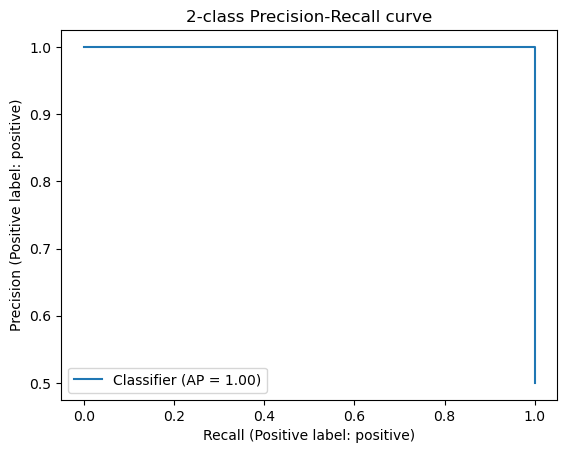

In [35]:
from sklearn.metrics import PrecisionRecallDisplay

def evaluate_embeddings_approach(df,
    labels = ['negative', 'positive'], 
    model = EMBEDDING_MODEL,
):
    label_embeddings = [get_embedding(label, engine=model) for label in labels]


    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = df["ReviewScore"].apply(lambda x: label_score(x, label_embeddings))
    df = df.assign(Probas=probas)
    print(df)
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(df.sentiment, preds)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach(df,labels=['An Amazon review with a negative sentiment.', 'An Amazon review with a positive sentiment.'])



In [7]:
import numpy as np
vec = np.zeros(300)

In [3]:
conda install fasttext


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.




PackagesNotFoundError: The following packages are not available from current channels:

  - fasttext

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://conda.anaconda.org/anaconda/win-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://conda.anaconda.org/openai/win-64
  - https://conda.anaconda.org/openai/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


